**Problem Statement**


Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. And there is where I come in.

In this problem, i am going to check how the phone's properties and characteristics affects the prices of the phones 

In this problem I do not have to predict actual price but a price range indicating how high the price is

The columns are 

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc:Primary Camera mega pixels

px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Mega Bytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are

three_g:Has 3G or not

touch_screen:Has touch screen or not

wifi:Has wifi or not

price_range:This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
#first thing to do is to import the dependencies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
mobile_train = pd.read_csv('/content/train.csv')
mobile_test = pd.read_csv('/content/test.csv')

In [ ]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_train.shape

(2000, 21)

In [ ]:
mobile_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
mobile_test.shape

(1000, 21)

test file has column ID, training doesnt have it, thats why they both have 21 columns 


In [ ]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
mobile_train.dtypes
#this will usually help us to knowthe categorical datatypes 

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

there are no empty columns or object data 

hence no need for data cleaning or reprocessing  

In [ ]:
#droping the id fromtest dataset 

mobile_test= mobile_test.drop('id',axis=True)

In [ ]:
mobile_test.shape
# back to 20 columns 

(1000, 20)

getting our statistical measures from our data 

In [ ]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Exploratory Data analysis 

<function matplotlib.pyplot.show>

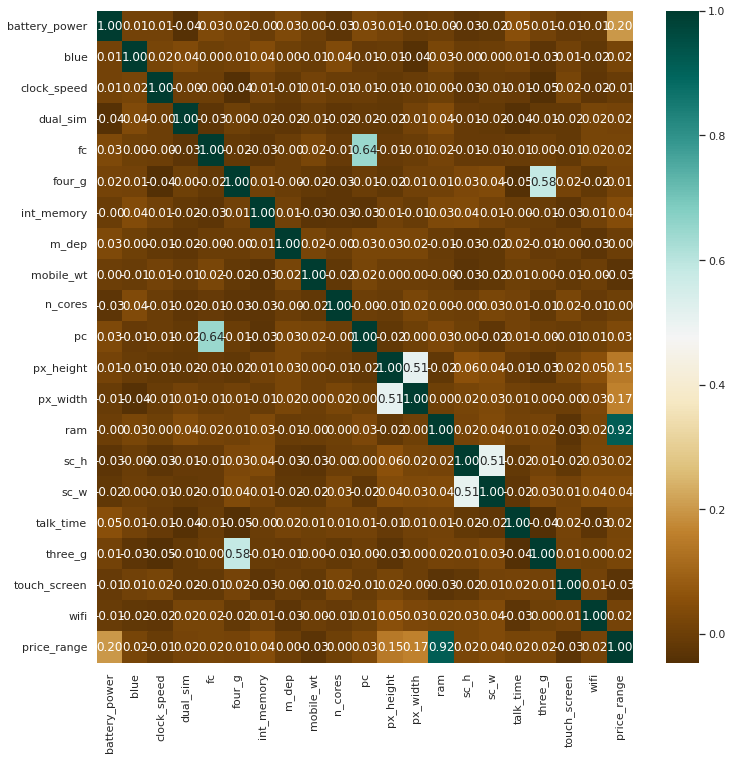

In [ ]:
corr = mobile_train.corr()
plt.figure(figsize=(12,12))
plot = sns.heatmap(corr,cbar=True,annot=True,fmt='.2f',cmap='BrBG')
plt.show

we can see the level of correlation our data has with the prices

the positively correlated colums are the ones that colored different

we can see that most of our data is postively correlated with price, whic means that the higher the go,the higer the price and vise versal

the RAM has the highest levelof correlation which means that it greatly affects the price of phones 

it only makes sense that phone height and phone width are positively correlated,they go hand in hand

front camera fc and the primary backcamera pc are alsopositively correlated

In [ ]:
sns.set()

<function matplotlib.pyplot.show>

<Figure size 504x504 with 0 Axes>

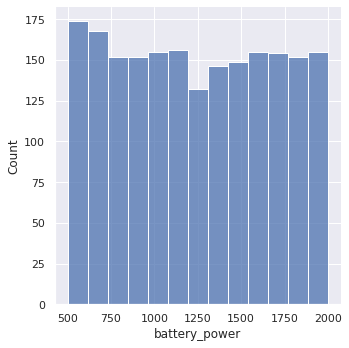

In [ ]:
plt.figure(figsize=(7,7))
sns.displot(mobile_train['battery_power'])
plt.show

this shows that majority ofthe phones bought had battery power between the range of 500-1250. quite a number of high powered battery phones were sold too.

the price ofthe phones with low batter power was cheaper 

<function matplotlib.pyplot.show>

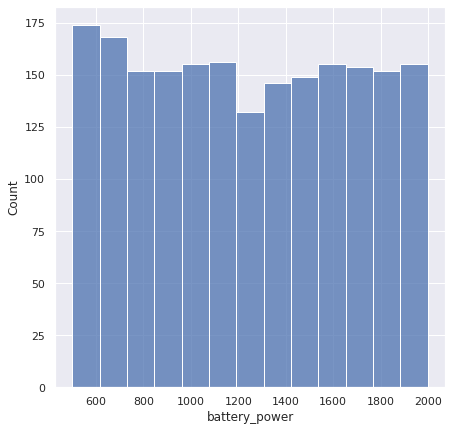

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(mobile_train['battery_power'])
plt.show

<function matplotlib.pyplot.show>

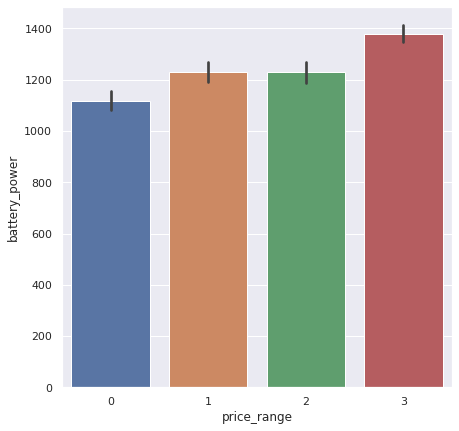

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y=mobile_train['battery_power'],x=mobile_train['price_range'])
plt.show

as can be simply seen,the higher the battery power,the higher the selling price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

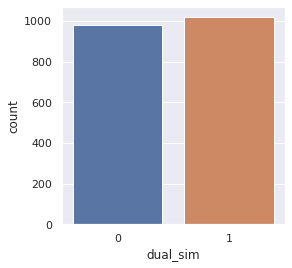

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(mobile_train['dual_sim'])
# sns.countplot(mobile_train['four_g'])
plt.show

almost the same number of dual sim phones was purchased as non-dual sim phones

In [ ]:
plt.figure(figsize=(4,4))
sns.displot(mobile_train['dual_sim'])
# sns.countplot(mobile_train['four_g'])
plt.show

<function matplotlib.pyplot.show>

<Figure size 504x504 with 0 Axes>

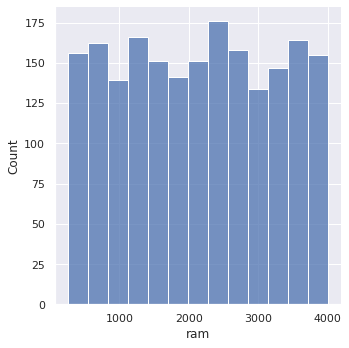

In [ ]:
# plt.figure(figsize=(7,7))
# sns.displot(mobile_train['ram'])
# plt.show

In [ ]:
# sns.pairplot(mobile_train)
# plt.show

#took five minutes to load 

<function matplotlib.pyplot.show>

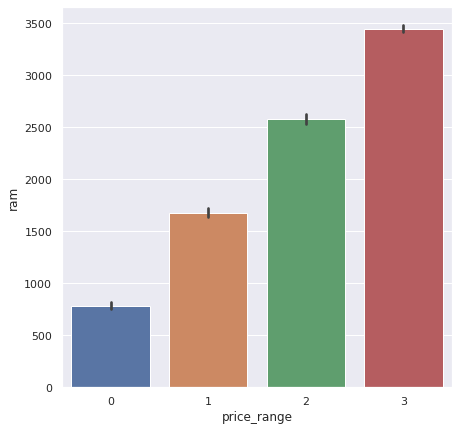

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y=mobile_train['ram'],x=mobile_train['price_range'])
plt.show

this bar plot showsclearly that the higher the ram, the higher the price as mostofthe phones with higher rams fallinthe very expensive category 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

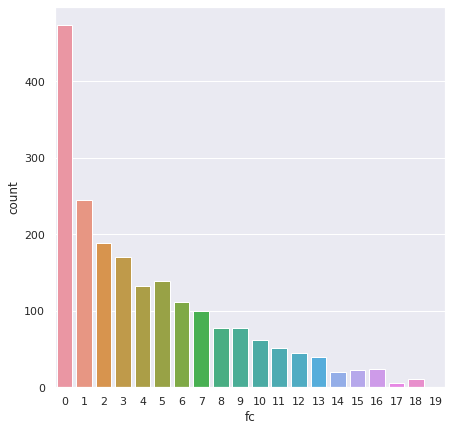

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(mobile_train['fc'])
plt.show

majority of the phones sold didnt have front cameras,so im aassuming alot of the people in this this dataset dont care somuch about selfies, which could mean that the population of females is quite low 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

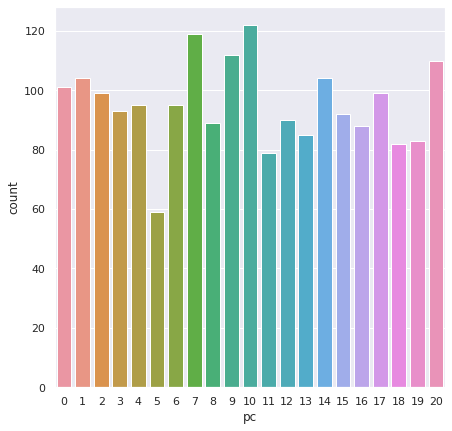

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(mobile_train['pc'])
plt.show

<function matplotlib.pyplot.show>

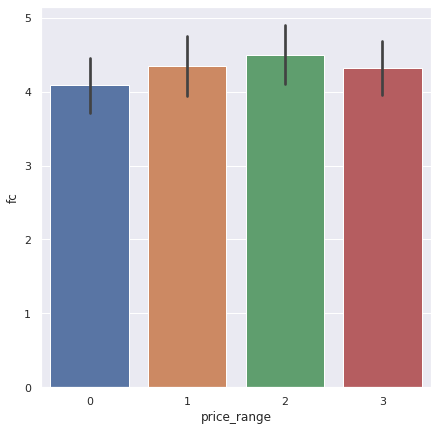

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y=mobile_train['fc'],x=mobile_train['price_range'])
plt.show

<function matplotlib.pyplot.show>

<Figure size 504x504 with 0 Axes>

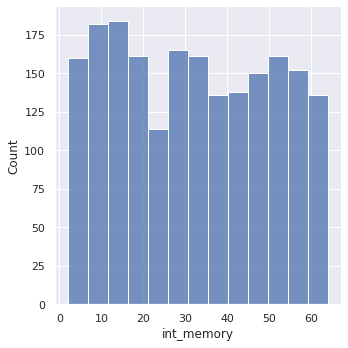

In [ ]:
plt.figure(figsize=(7,7))
sns.displot(mobile_train['int_memory'])
plt.show

<function matplotlib.pyplot.show>

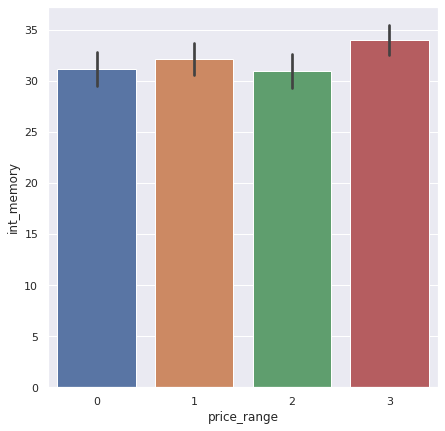

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y=mobile_train['int_memory'],x=mobile_train['price_range'])
plt.show

<function matplotlib.pyplot.show>

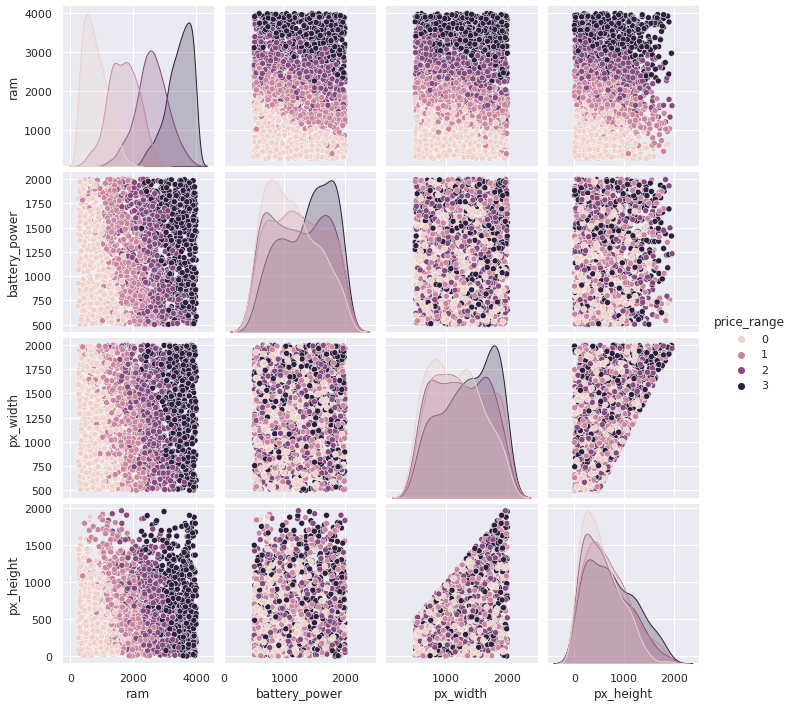

In [ ]:
sns.pairplot(mobile_train[['ram', 'battery_power', 'px_width', 'px_height', 'price_range']], hue='price_range')
plt.show

this plot shows the four main factors that affect the price of the phones,and we can see graphically howw they also affect each other. 



The Ram ofthe phone clearly has the most effect on the price distribution of the phones....the higher the ram,the higher the prices and vise versal





<function matplotlib.pyplot.show>

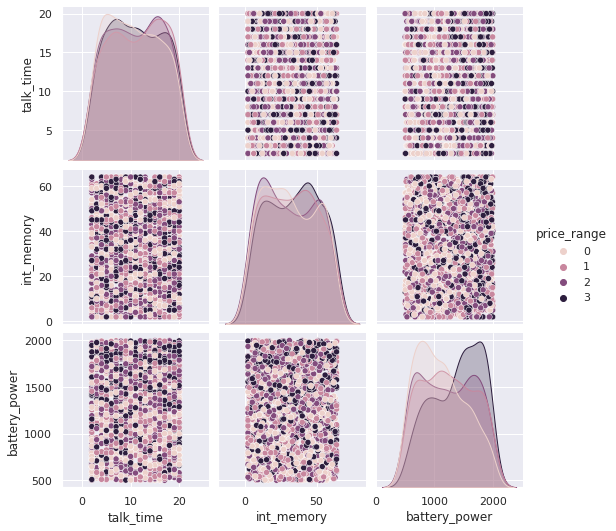

In [ ]:
sns.pairplot(mobile_train[['talk_time', 'int_memory','battery_power','price_range']], hue='price_range')
plt.show

even though these two are positivel correlated on the pricing of the phones,they dont have a significant effect on the price groomings 

all in all,

if i were to advice this dude, i would tell him topay particular attention tothe RAM of the phones he wants to make, as more than 80% of price determination is decided by the ram

then secondly the batery power,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


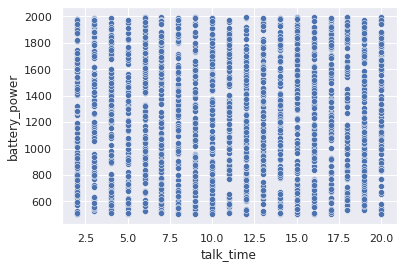

In [ ]:
sns.scatterplot(mobile_train.talk_time,mobile_train.battery_power)

this here shows just how absord this dataset is tome.ypu expect that the more the battery power,themore the talk time but it clearly isnt, there is no pattern to the data 

ML

for training dataset

In [ ]:
classifier = XGBClassifier()
classifier_1 = RandomForestClassifier()
classifier_2 = DecisionTreeClassifier()

In [ ]:
X= mobile_train.drop(['price_range'],axis=1)
Y =mobile_train.price_range

In [ ]:
classifier.fit(X,Y)
classifier_1.fit(X,Y)
classifier_2.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
Xgboost_training_data_prediction = classifier.predict(X)

Random_forest_classifier_training_data_prediction = classifier_1.predict(X)

Decision_tree_training_data_prediction = classifier_2.predict(X)



In [ ]:
Xgboost_training_data_accuracy = accuracy_score(Y,Xgboost_training_data_prediction)

Random_forest_training_data_accuracy = accuracy_score(Y,Random_forest_classifier_training_data_prediction)

Decison_tree_training_data_accuracy = accuracy_score(Y,Decision_tree_training_data_prediction)



In [ ]:
print('the accuracy score of our XGboost classification training data is', Xgboost_training_data_accuracy)
print()
print('the accuracy score of our Random_forest classification training data is',Random_forest_training_data_accuracy )
print()
print('the accuracy score of our Decision tree classification training data is', Decison_tree_training_data_accuracy)




the accuracy score of our XGboost classification training data is 0.9805

the accuracy score of our Random_forest classification training data is 1.0

the accuracy score of our Decision tree classification training data is 1.0


In [ ]:
print(Decision_tree_training_data_prediction)

[1 2 2 ... 3 0 3]


for test dataset 

In [ ]:
Decision_tree_training_data_prediction = classifier_2.predict(mobile_test)


In [ ]:
print(Decision_tree_training_data_prediction)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 1 2 0 3 2 0 3 2 1 3 0 2 0 3 0 2 0 3 0 0 2 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 0 3 3 2 0 1 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 2 2 1 2 1 0 2 2 3 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 3 2 2 0 2 1 1 3 0 1 0 3 2 1 2 1 3 3 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 0 0 2 1 0 1 2 0 0 0 1 2
 2 2 1 0 0 0 1 0 3 2 1 2 2 2 2 1 2 3 3 3 2 2 0 0 0 1 2 0 2 3 3 1 2 0 3 2 2
 3 0 0 1 1 3 0 1 0 2 2 1 3 0 3 0 3 1 2 0 0 2 1 3 2 3 2 1 3 0 0 2 3 3 1 3 1
 0 2 2 1 2 3 3 3 1 1 1 2 2 2 1 3 2 0 3 0 0 2 0 0 3 2 3 3 3 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 0 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 3 2 3 1 3 3 2 2 3 3 3 1 3 1 3 1 3 1 2 3 0 2 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 3 2 0 1 1 0 3 2 0 3 1 2 1 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 1 2 2 3 2 3 0 3 0 3 0 1 1 0 1 0 3 2 3 2 1 3 1 3 2 3 2 0 2 2 2 2 0 0
 0 2 2 1 1 3 3 0 2 2 0 0 3 0 1 0 3 2 3 0 3 0 2 3 3 3 0 2 0 2 2 0 1 2 0 0 1
 1 1 3 3 3 2 3 1 2 2 2 3 

these are the price categories to expect from the new phone dataset